# Machine Learning Project

## Grupo G1_9
Mafalda Aires up202106550

Gonçalo Monteiro up202105821

## K-nearest neighbors algorithm (k-NN)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from matplotlib.colors import ListedColormap

from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, ClassifierMixin
#acrescentar
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import scipy.stats as ss

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

from scipy.io import arff

In [2]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [3]:
class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self,k):
        self.k = k
    
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
        

    def predict(self,X):
        predicted_labels=[self._predict(x) for x in X]
        return np.array(predicted_labels)
    
   
    def _predict(self,x):
        distances = [euclidean_distance(x,x_train) for x_train in self.X_train]
        
        k_idx = np.argsort(distances)[: self.k]
        
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        
        most_common = Counter(k_neighbor_labels).most_common(1)
        
        return most_common[0][0]
    
    
    def accuracy(self,y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

## Comparação do meu knn com o knn do sklearn

Nesta comparação, usamos uma dataset dada na aula HandsOn 4: Classification I (ds2.csv), à qual chamamos **compare.csv**.
Este dataset tem 3 target classes. Todos os atributos são numéricos.

### data set load

In [4]:
dt = pd.read_csv("compare.csv")
dt

,X1,X2,Class
0,1.201204,2.685858,1
1,-0.475656,1.278883,0
2,1.854452,0.021771,2
3,0.126927,0.024181,2
4,-0.988873,0.788911,0
...,...,...,...
195,0.020843,1.029939,0
196,0.662639,-1.150929,2
197,2.077741,-1.610384,2
198,-1.710734,0.684729,0


In [5]:
X = dt.loc[:, dt.columns != 'Class'].values
y = dt['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

### Implementação do knn do sklearn

In [6]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
fit = knn_sklearn.fit(X_train, y_train)
pred = knn_sklearn.predict(X_test)

### Implementação do meu knn

In [7]:
knn = KNN(k=3)
knn_fit = knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### Comparação das suas precisões

In [8]:
print("Precisão do meu KNN: ", knn.accuracy(y_test, knn_pred))

print("Precisão do KNN do sklearn: ", accuracy_score(y_test, pred))

Precisão do meu KNN:  0.8
Precisão do KNN do sklearn:  0.8


### Comparing Confusion Matrices

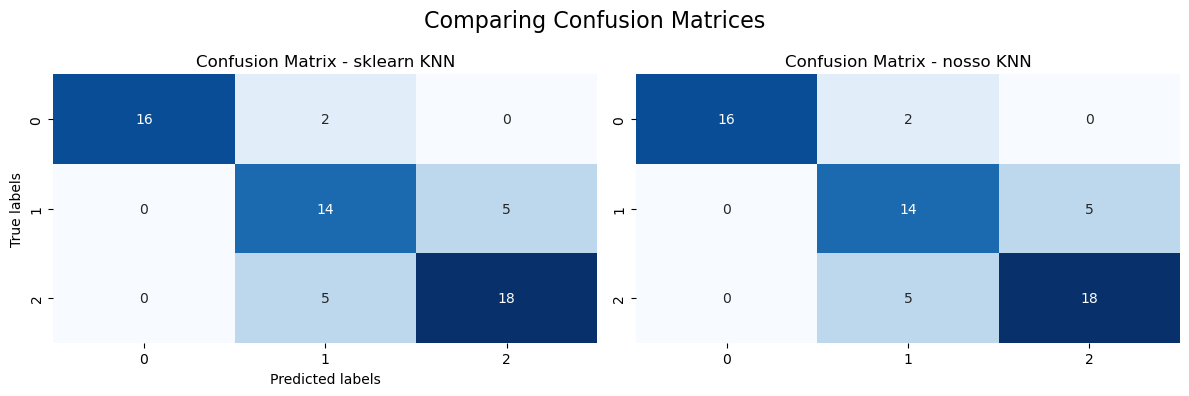

In [9]:
#SKLEARN KNN
cm_sklearn = confusion_matrix(y_test, pred)

#NOSSO KNN
cm_nosso = confusion_matrix(y_test, knn_pred)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrix for sklearn KNN
axs[0].set_title('Confusion Matrix - sklearn KNN')
sns.heatmap(cm_sklearn, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axs[0])
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')

# Plot confusion matrix for nosso KNN
axs[1].set_title('Confusion Matrix - nosso KNN')
sns.heatmap(cm_nosso, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axs[1])
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')

fig.suptitle('Comparing Confusion Matrices', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

### Comparing Classification Reports

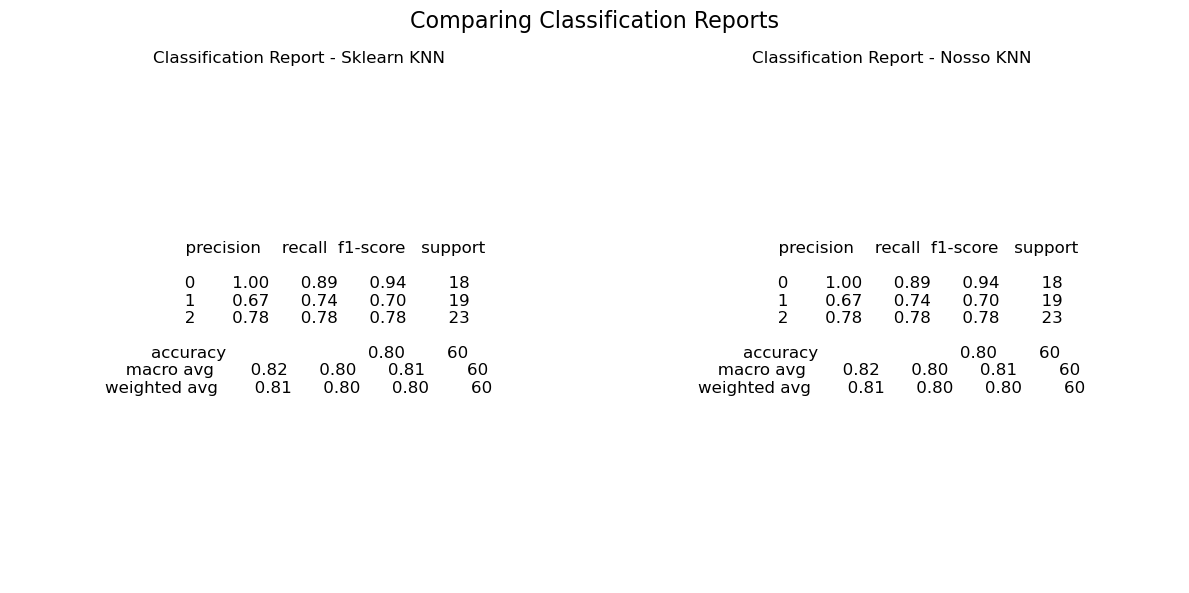

In [10]:
# Classification report para Sklearn KNN
report_sklearn = classification_report(y_test, pred)

# Classification report para Nosso KNN
report_nosso = classification_report(y_test, knn_pred)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot classification report for Sklearn KNN
axs[0].text(0.5, 0.5, report_sklearn, horizontalalignment='center', verticalalignment='center', fontsize=12)
axs[0].axis('off')
axs[0].set_title('Classification Report - Sklearn KNN')

# Plot classification report for Nosso KNN
axs[1].text(0.5, 0.5, report_nosso, horizontalalignment='center', verticalalignment='center', fontsize=12)
axs[1].axis('off')
axs[1].set_title('Classification Report - Nosso KNN')

# Set the main title
fig.suptitle('Comparing Classification Reports', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

## WeightedKNN

O wKNN distingue-se do KNN na utilização de pesos para calcular a distância euclideana. Neste caso, o peso de uma distância para um registo baseia-se no próprio desvio padrão. Isto é, distâncias muito afastadas da média terão menor peso no cálculo da distância ao passo que distâncias associadas a um menor desvio padrão terão maior peso. No algoritmo, *self.std_devs* é responsável por calcular o desvio padrão e *self.weights* é responsável por determinar o peso associado às distâncias calculando o inverso do desvio padrão para a respetiva distância.

In [11]:
class WeightedKNN(BaseEstimator, ClassifierMixin):
    def __init__(self,k):
        self.k = k
    
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
        self.std_devs = np.std(X, axis=0)
        self.weights = self.weights = (1 / self.std_devs) / np.sum(1 / self.std_devs)

        
    def predict(self, X):
        y_pred = []
        for sample in X:
            distances = np.sqrt(np.sum(((self.X_train - sample) * self.weights) ** 2, axis=1))
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_classes = self.y_train[k_indices]
            unique_classes, counts = np.unique(k_nearest_classes, return_counts=True)
            most_frequent_class = unique_classes[np.argmax(counts)]
            y_pred.append(most_frequent_class)
        return y_pred
    
    
    def accuracy(self,y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

## Comparação do KNN com pesos com o KNN sem pesos (ambos implementados por nós)

### Funções de auxílio para a análise

Best k for knn

In [12]:
def find_k_knn(X, y, k_max):
    k_values = range(1, k_max + 1)
    scores = []

    for i in k_values:
        knn = KNN(k=i)
        score = np.mean(cross_val_score(knn, X, y, cv=5,scoring='accuracy'))
        scores.append(score)

    # Plotting the results
    plt.plot(k_values, scores, marker='o')
    plt.xlabel("k Values")
    plt.ylabel("Cross-Validation Accuracy Score")
    plt.title("Finding the Best k for KNN")
    plt.show()

    print("Best k for knn: ", k_values[np.argmax(scores)])

Best k for wknn

In [13]:
def find_k_wknn(X,y,k_max):
    k_values = range(1, k_max + 1)
    scores = []

    for i in k_values:
        knn = WeightedKNN(k=i)
        score = np.mean(cross_val_score(knn, X, y, cv=5,scoring='accuracy'))
        scores.append(score)

    # Plotting the results
    plt.plot(k_values, scores, marker='o')
    plt.xlabel("k Values")
    plt.ylabel("Cross-Validation Accuracy Score")
    plt.title("Finding the Best k for Weighted KNN")
    plt.show()

    print("Best k for wknn: ", k_values[np.argmax(scores)])

Confusion Matrix

In [14]:
#Priting the confusion matrix
def print_cm(cm_knn,cm_wknn):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot confusion matrix para o Nosso KNN sem pesos
    axs[0].set_title('Confusion Matrix - KNN')
    sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axs[0])
    axs[0].set_xlabel('Predicted labels')
    axs[0].set_ylabel('True labels')

    # Plot confusion matrix para o Nosso KNN com pesos
    axs[1].set_title('Confusion Matrix - Weighted KNN')
    sns.heatmap(cm_wknn, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axs[1])
    axs[0].set_xlabel('Predicted labels')
    axs[0].set_ylabel('True labels')

    fig.suptitle('Comparing Confusion Matrices', fontsize=16)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the figure
    plt.show()

Classification Report

In [15]:
#Priting the classification reports
def print_cr(report_knn, report_wknn):
    # Create a figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot classification report para o Nosso KNN sem pesos
    axs[0].text(0.5, 0.5, report_knn, horizontalalignment='center', verticalalignment='center', fontsize=12)
    axs[0].axis('off')
    axs[0].set_title('Classification Report - KNN')

    # Plot classification report para o Nosso KNN com pesos
    axs[1].text(0.5, 0.5, report_wknn, horizontalalignment='center', verticalalignment='center', fontsize=12)
    axs[1].axis('off')
    axs[1].set_title('Classification Report - Weighted KNN')

    # Set the main title
    fig.suptitle('Comparing Classification Reports', fontsize=16)

    # Adjust spacing between subplots
    plt.tight_layout()
        
    # Display the figure
    plt.show()

K-fold cross validation

In [16]:
# k-fold-for10folds
# Define the number of folds and create the K-Fold object

def k_fold_cross_validation(model,Xtrain,Xtest,ytrain,ytest,X,y,k):

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Create a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X1):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]

        # Create and fit the KNN classifier
        kn = model(3)
        kn.fit(Xtrain, ytrain)

        # Make predictions on the test set
        ypred = kn.predict(Xtest)

        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(ytest, ypred)
        accuracy_scores.append(accuracy)
    
    return accuracy_scores

def show_fold_cross_validation(knn_accuracy, wknn_accuracy):
    fig, ax = plt.subplots()
    ax.boxplot([knn_accuracy, wknn_accuracy])
    ax.set_xticklabels(['KNN', 'WKNN'])
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy Scores of K-Fold Cross-Validation for KNN and WKNN')
    plt.show()

def show_mean_dev(knn_accuracy, wknn_accuracy):
    # KNN
    mean_accuracy_knn = np.mean(knn_accuracy)
    std_accuracy_knn = np.std(knn_accuracy)
    
    # WKNN
    mean_accuracy_wknn = np.mean(wknn_accuracy)
    std_accuracy_wknn = np.std(wknn_accuracy)
    
    # Plot both
    fig, ax = plt.subplots()
    ax.bar(['KNN', 'WKNN'], [mean_accuracy_knn, mean_accuracy_wknn], yerr=[std_accuracy_knn, std_accuracy_wknn])
    ax.set_ylabel('Accuracy')
    ax.set_title('Mean Accuracy and Standard Deviation Comparison')
    
    # Add mean and std text at the bottom of the bars
    ax.text(0, 0.05, f'Mean: {mean_accuracy_knn:.2f}\nStd: {std_accuracy_knn:.2f}', ha='center')
    ax.text(1, 0.05, f'Mean: {mean_accuracy_wknn:.2f}\nStd: {std_accuracy_wknn:.2f}', ha='center')
    
    plt.show()

### Dataset1

In [17]:
dt1 = pd.read_csv('breast_cancer_coimbra.csv')
dt1.dropna(inplace=True)
dt1

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [18]:
X1 = dt1.loc[:, dt1.columns != 'Classification'].values
y1 = dt1['Classification'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1234)

In [19]:
knn1 = KNN(k=3)
knn_fit1 = knn.fit(X1_train, y1_train)
knn_pred1 = knn.predict(X1_test)

In [20]:
wknn1 = WeightedKNN(k=3)
wknn_fit1 = wknn1.fit(X1_train, y1_train)
wknn_pred1 = wknn1.predict(X1_test)

### Confusion Matrix

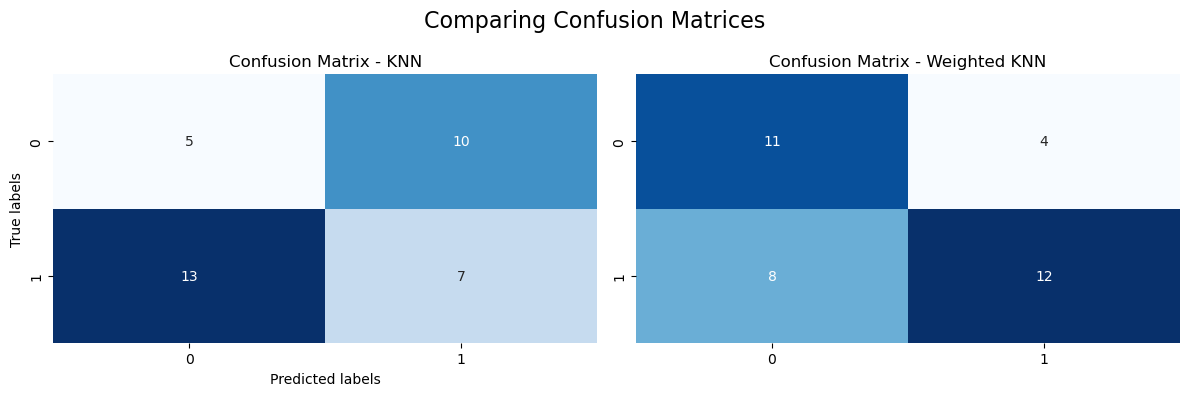

In [21]:
#KNN SEM PESOS
cm_knn1 = confusion_matrix(y1_test, knn_pred1)

#KNN COM PESOS
cm_wknn1 = confusion_matrix(y1_test, wknn_pred1)

print_cm(cm_knn1,cm_wknn1)

### Find the best knn according to the accuracy score

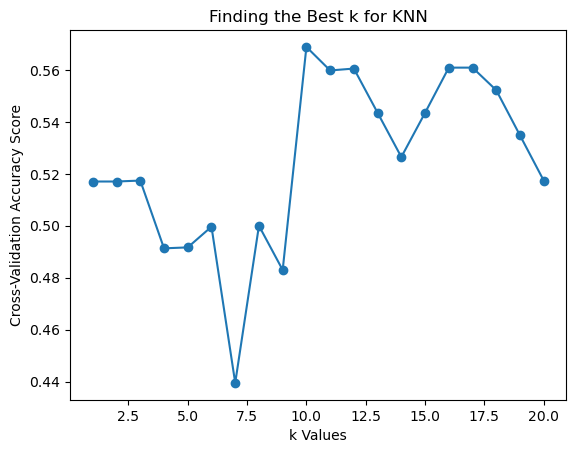

Best k for knn:  10



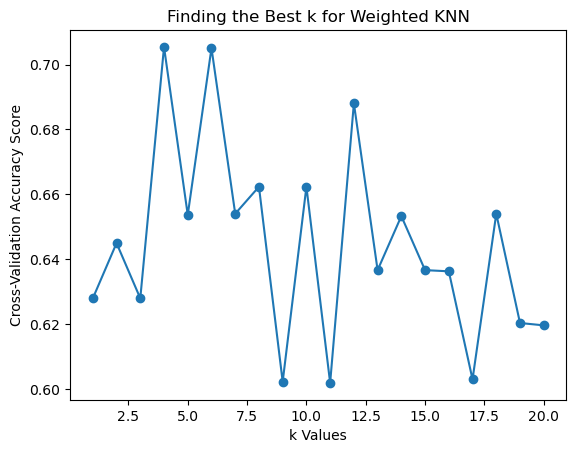

Best k for wknn:  4


In [22]:
find_k_knn(X1,y1,20)
print()
find_k_wknn(X1,y1,20)

### Comparing Classification Reports

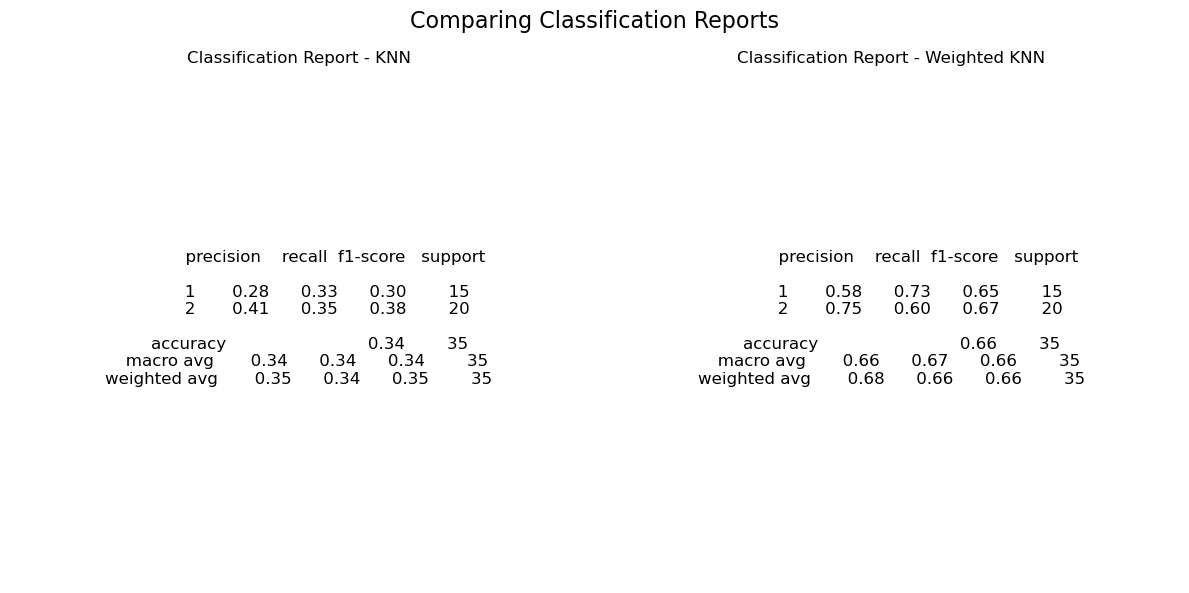

In [23]:
# Classification report para Nosso KNN sem pesos
report_knn1 = classification_report(y1_test, knn_pred1)

# Classification report para Nosso KNN com pesos
report_wknn1 = classification_report(y1_test, wknn_pred1)

print_cr(report_knn1,report_wknn1)

###  K-fold cross-validation

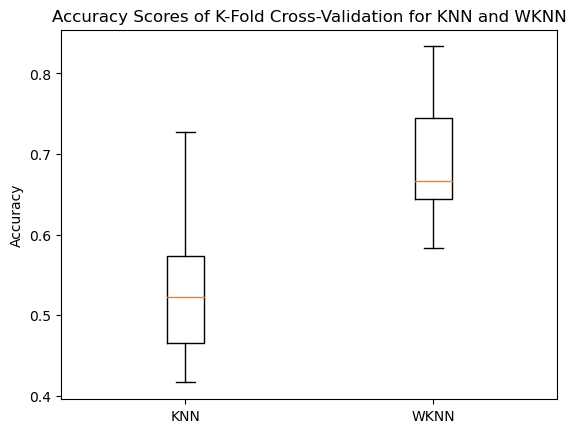

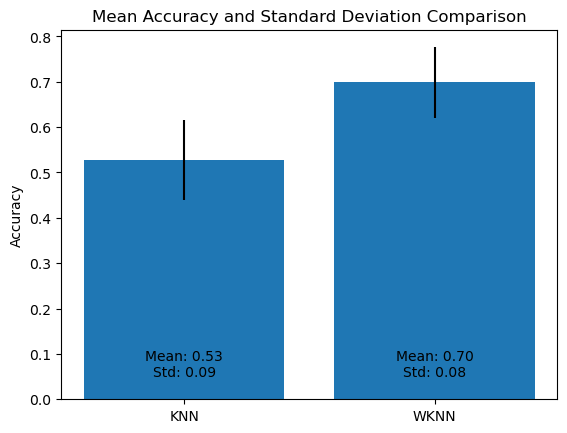

In [24]:
knn_accuracy1= k_fold_cross_validation(KNN,X1_train,X1_test,y1_train,y1_test,X1,y1,10)
wknn_accuracy1= k_fold_cross_validation(WeightedKNN,X1_train,X1_test,y1_train,y1_test,X1,y1,10)
show_fold_cross_validation(knn_accuracy1, wknn_accuracy1)
show_mean_dev(knn_accuracy1, wknn_accuracy1)

### Dataset 2

In [25]:
data = arff.loadarff('mofn-rules.arff')
dt2 = pd.DataFrame(data[0])

numeric=['Bit-0', 'Bit-1', 'Bit-2', 'Bit-3', 'Bit-4', 'Bit-5', 'Bit-6', 'Bit-7', 'Bit-8', 'Bit-9', 'class']
dt2[numeric] = dt2[numeric].apply(pd.to_numeric, errors='coerce')

dt2.dropna(inplace=True)
dt2

,Bit-0,Bit-1,Bit-2,Bit-3,Bit-4,Bit-5,Bit-6,Bit-7,Bit-8,Bit-9,class
0,0,1,1,1,0,1,0,0,0,1,1
1,1,0,1,1,1,0,1,0,1,1,1
2,1,0,0,1,0,1,0,1,0,1,1
3,0,0,1,0,0,1,0,0,1,0,1
4,1,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1319,1,1,1,1,1,0,1,1,0,0,1
1320,0,0,0,1,0,0,1,1,1,0,1
1321,0,0,0,1,1,1,0,0,0,1,1
1322,0,1,0,0,1,0,0,1,0,1,0


In [26]:
X2 = dt2.loc[:, dt2.columns != 'class'].values
y2 = dt2['class'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1234)

In [27]:
knn2 = KNN(k=3)
knn_fit2 = knn.fit(X2_train, y2_train)
knn_pred2 = knn.predict(X2_test)

In [28]:
wknn2 = WeightedKNN(k=3)
wknn_fit2 = wknn2.fit(X2_train, y2_train)
wknn_pred2 = wknn2.predict(X2_test)

### Confusion Matrix

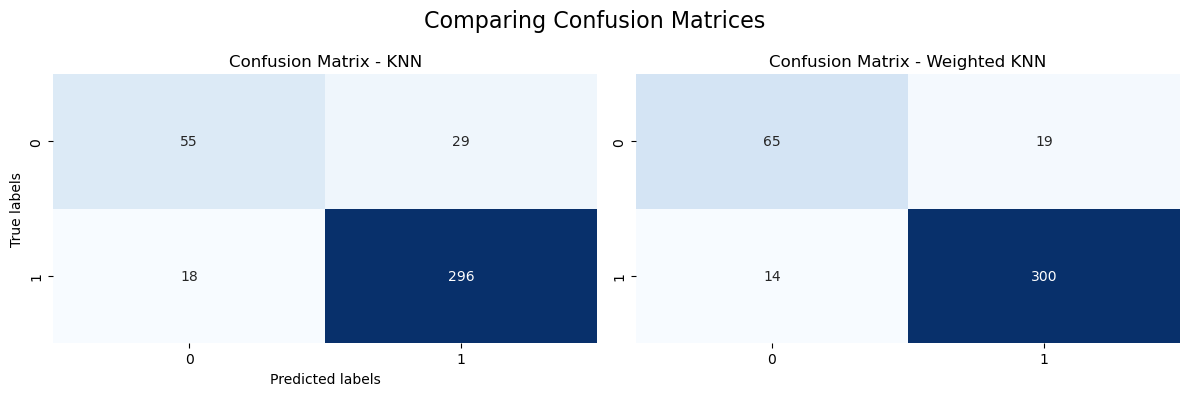

In [29]:
#KNN SEM PESOS
cm_knn2 = confusion_matrix(y2_test, knn_pred2)

#KNN COM PESOS
cm_wknn2 = confusion_matrix(y2_test, wknn_pred2)

print_cm(cm_knn2,cm_wknn2)

### Find the best knn according to the accuracy score

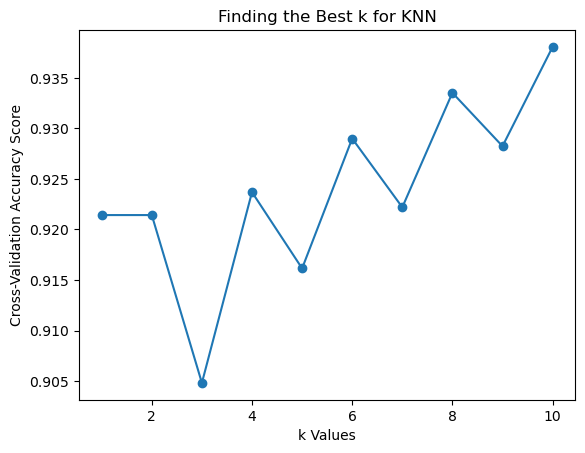

Best k for knn:  10



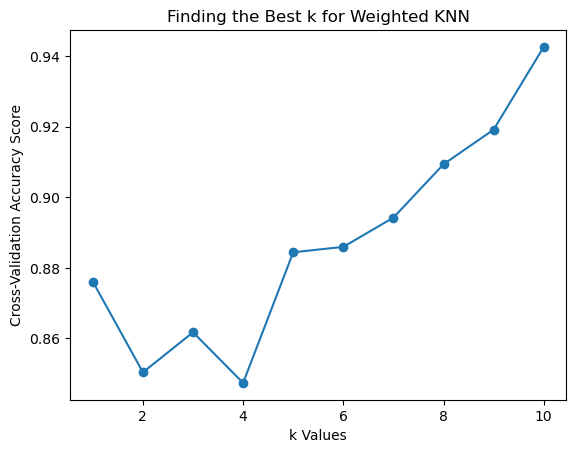

Best k for wknn:  10


In [30]:
find_k_knn(X2,y2,10)
print()
find_k_wknn(X2,y2,10)

### Comparing Classification Reports

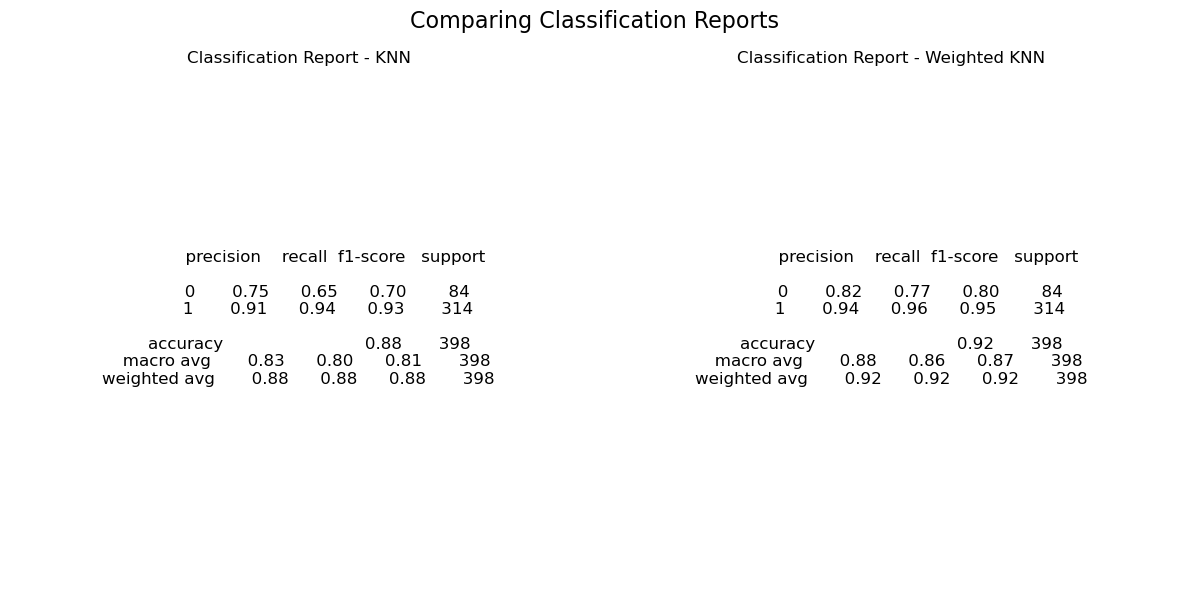

In [31]:
# Classification report fpara Nosso KNN sem pesos
report_knn2 = classification_report(y2_test, knn_pred2)

# Classification report para Nosso KNN com pesos
report_wknn2 = classification_report(y2_test, wknn_pred2)

print_cr(report_knn2,report_wknn2)

###  K-fold cross-validation

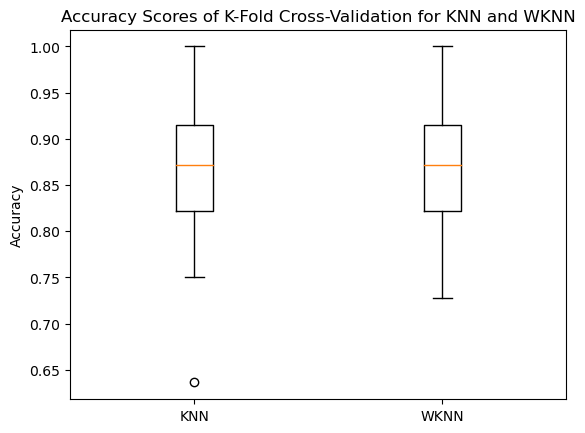

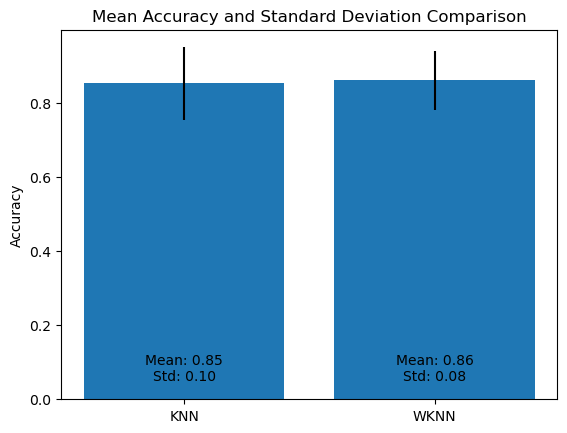

In [32]:
knn_accuracy2= k_fold_cross_validation(KNN,X2_train,X2_test,y2_train,y2_test,X2,y2,10)
wknn_accuracy2= k_fold_cross_validation(WeightedKNN,X2_train,X2_test,y2_train,y2_test,X2,y2,10)
show_fold_cross_validation(knn_accuracy2, wknn_accuracy2)
show_mean_dev(knn_accuracy2, wknn_accuracy2)

### Dataset 3

In [33]:
data = arff.loadarff('tae.arff')
dt3 = pd.DataFrame(data[0])

numeric=['Whether_of_not_the_TA_is_a_native_English_speaker', 'Summer_or_regular_semester', 'Class_attribute']
dt3[numeric] = dt3[numeric].apply(pd.to_numeric, errors='coerce')

dt3.dropna(inplace=True)

dt3.head()

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,1,23.0,3.0,1,19.0,3
1,2,15.0,3.0,1,17.0,3
2,1,23.0,3.0,2,49.0,3
3,1,5.0,2.0,2,33.0,3
4,2,7.0,11.0,2,55.0,3


In [34]:
X3 = dt3.loc[:, dt3.columns != 'Class_attribute'].values
y3 = dt3['Class_attribute'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1234)

In [35]:
knn3 = KNN(k=3)
knn_fit3 = knn.fit(X3_train, y3_train)
knn_pred3 = knn.predict(X3_test)

In [36]:
wknn3 = WeightedKNN(k=3)
wknn_fit3 = wknn3.fit(X3_train, y3_train)
wknn_pred3 = wknn3.predict(X3_test)

### Confusion Matrix

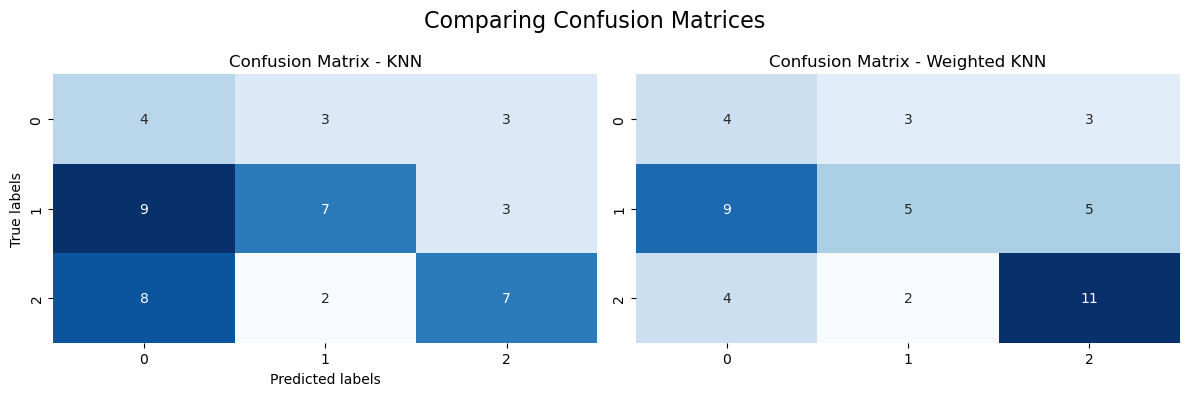

In [37]:
#KNN SEM PESOS
cm_knn3 = confusion_matrix(y3_test, knn_pred3)

#KNN COM PESOS
cm_wknn3 = confusion_matrix(y3_test, wknn_pred3)

print_cm(cm_knn3,cm_wknn3)

### Find the best knn according to the accuracy score

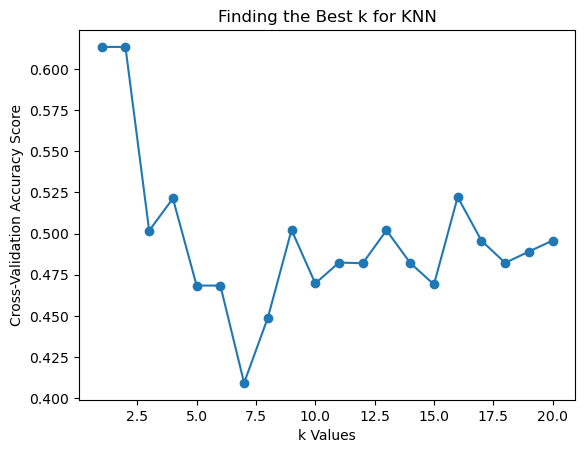

Best k for knn:  1


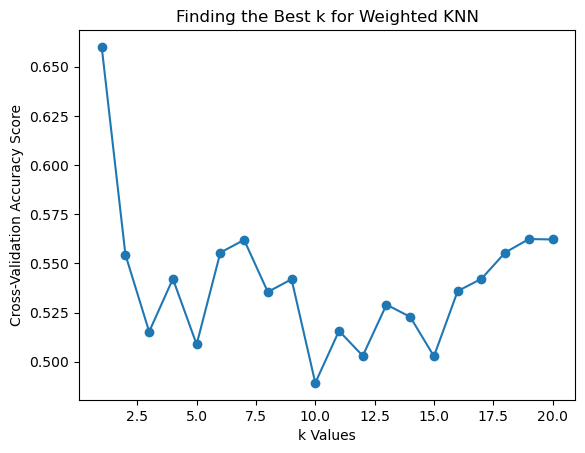

Best k for wknn:  1


In [38]:
find_k_knn(X3,y3,20)
find_k_wknn(X3,y3,20)

### Comparing Classification Reports

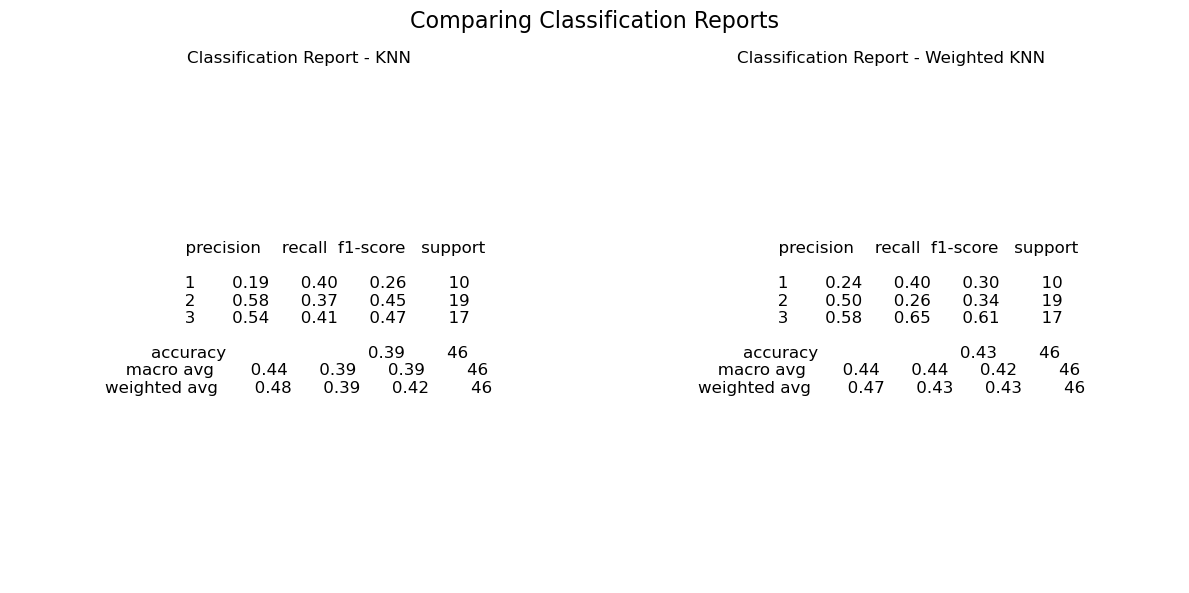

In [39]:
# Classification report para Nosso KNN sem pesos
report_knn3 = classification_report(y3_test, knn_pred3)

# Classification report para Nosso KNN com pesos
report_wknn3 = classification_report(y3_test, wknn_pred3)

print_cr(report_knn3,report_wknn3)

###  K-fold cross-validation

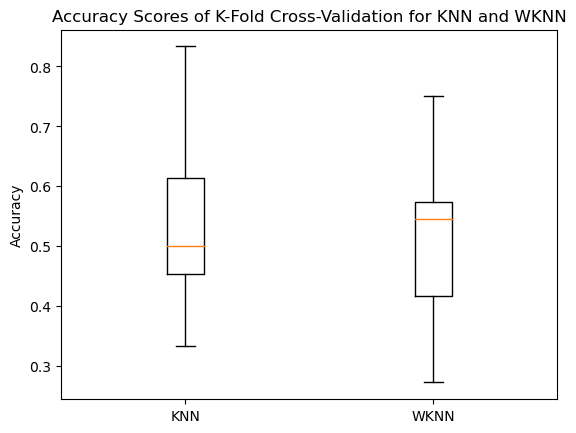

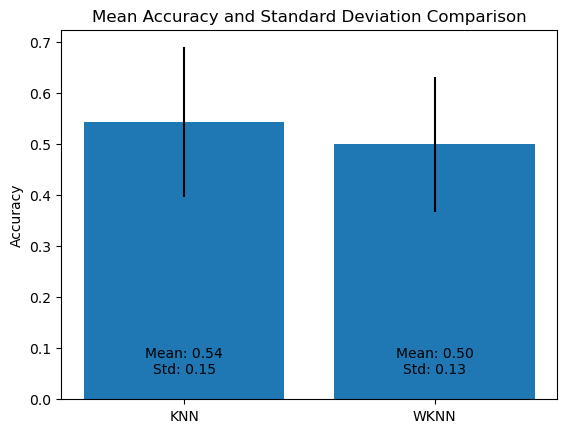

In [40]:
#k-fold-for10folds.
# Define the number of folds and create the K-Fold object

knn_accuracy3 = k_fold_cross_validation(KNN,X3_train,X3_test,y3_train,y3_test,X3,y3,10)
wknn_accuracy3 = k_fold_cross_validation(WeightedKNN,X3_train,X3_test,y3_train,y3_test,X3,y3,10)
show_fold_cross_validation(knn_accuracy3, wknn_accuracy3)
show_mean_dev(knn_accuracy3, wknn_accuracy3)